In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

import camb
from camb import model, initialpower
import pandas as pd
import re

from cassL import camb_interface as ci

In [15]:
spectra = ci.boltzmann_battery(np.array([0.]), skips_omega=[1, 2, 3],
                               skips_model=[8],
    skips_snapshot=[], hubble_units=False, models=ci.cosm, fancy_neutrinos=False, k_points=100000)
spectra = spectra[0.] # denest

In [16]:
original_colors = np.array(["gray", "blue", "cyan", "black", "green", "purple", "yellow", "brown"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

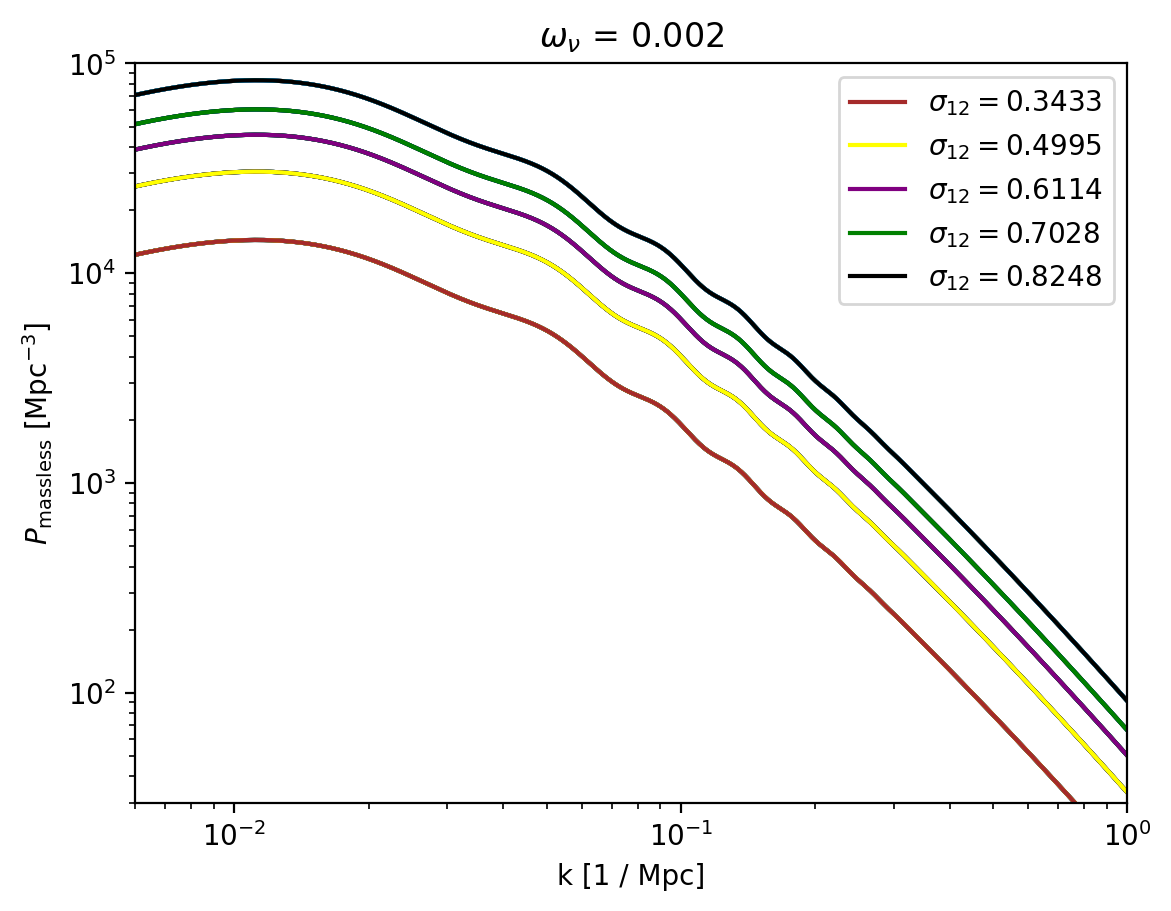

In [36]:
for i in range(len(spectra) - 1): # hack to get rid of Nones at the end
    h = ci.cosm.loc[i]["h"]
    for j in range(5):
        these_colors = np.roll(original_colors, j)
        k = spectra[i][j]["k"]
        p = spectra[i][j]["P_no"]
        if i == 7:
            s12_str = str(np.around(spectra[i][j]["s12_massless"][0], 4))
            plt.loglog(k, p,
                     label=r"$\sigma_{12} =" + s12_str + "$",
                    c=these_colors[i])
        else:
            plt.loglog(k, p, c=these_colors[i])
    plt.xlabel(r"k [1 / Mpc]")
    plt.xlim((6e-3, 1))
    plt.ylim((3e1, 1e5))
    plt.ylabel(r"$P_\mathrm{massless}$ [Mpc$^{-3}$]")
    plt.title(r"$\omega_\nu$ = " + str(omega_nu[omega_index]))
    plt.legend()
    
    plt.savefig("san21f2")